 # 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

# 2.Collecting data

In [2]:
data = pd.read_csv('uber-raw-data-apr14.csv')

In [3]:
df =data.copy()

- Display first and Last five rows

In [4]:
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [5]:
df.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


# 3. Preparing Data

- Converting Date/Time to pd.to_datetime

In [6]:
df['Date/Time']= pd.to_datetime(df['Date/Time'])

In [7]:
df.head()

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512


In [8]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

# 4.Feature Engineering

- Adding day of month 
- Adding day of Week

In [9]:
def get_dom(dt):
    return dt.day

In [10]:
df['MonthDay']= df['Date/Time'].map(get_dom)

In [11]:
def get_wd(dt):
    return dt.dayofweek

In [12]:
df['WeekDay'] = df['Date/Time'].map(get_wd)

In [13]:
df.head()

,Date/Time,Lat,Lon,Base,MonthDay,WeekDay
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1


- Getting hour of the day

In [14]:
def get_hod(dt):
    return dt.hour


df['DayHour'] = df['Date/Time'].map(get_hod)

In [15]:
df.tail()

,Date/Time,Lat,Lon,Base,MonthDay,WeekDay,DayHour
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,2,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,2,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,2,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,2,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,2,23


# 5.Analysis

Analyze the Day of Month

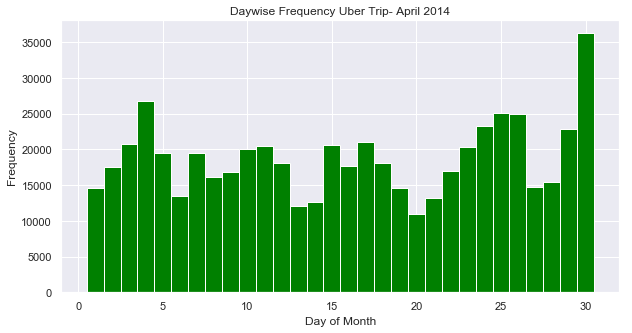

In [16]:
plt.figure(figsize=(10,5))
plt.hist(df.MonthDay,  color= 'Green', bins=30, range=(0.5,30.5))
plt.title('Daywise Frequency Uber Trip- April 2014')
plt.xlabel('Day of Month')
plt.ylabel('Frequency')
plt.show()

C:\Users\ASIFIQBAL\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


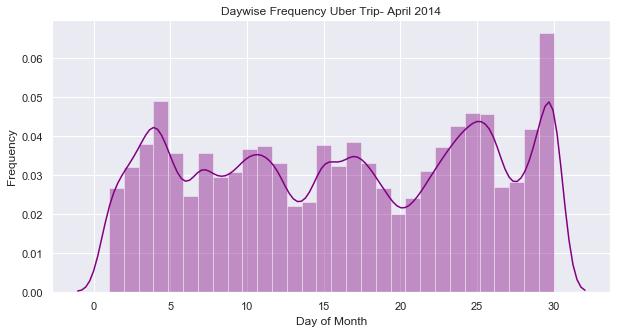

In [17]:
plt.figure(figsize=(10,5))
sns.distplot(df['MonthDay'], bins=30,color='Purple')
plt.title('Daywise Frequency Uber Trip- April 2014')
plt.xlabel('Day of Month')
plt.ylabel('Frequency')
plt.show()

- Sorting values of Day of Month and plotting it...

In [18]:
Dom = df.groupby('MonthDay')['Date/Time'].agg('count')
Dom

MonthDay
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
Name: Date/Time, dtype: int64

In [19]:
Dom_Sorted = Dom.sort_values()
Dom_Sorted

MonthDay
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
Name: Date/Time, dtype: int64

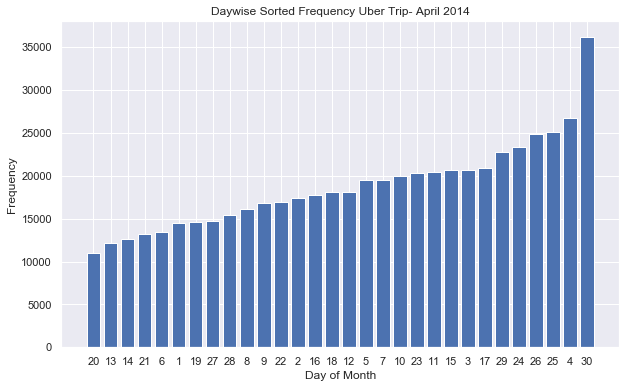

In [20]:
plt.figure(figsize=(10,6))
plt.bar(range(1,31), Dom_Sorted)
plt.xticks(range(1,31), Dom_Sorted.index)
plt.title('Daywise Sorted Frequency Uber Trip- April 2014')
plt.xlabel('Day of Month')
plt.ylabel('Frequency')
plt.show()

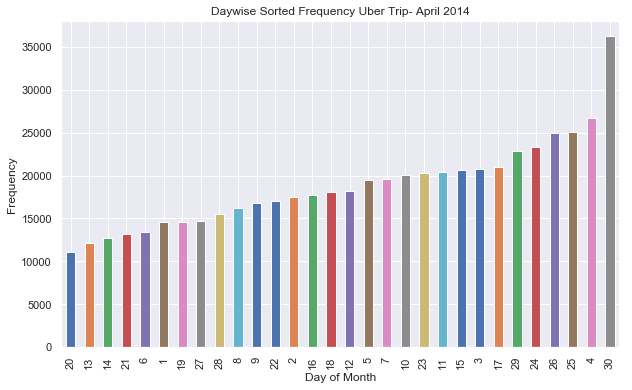

In [21]:
Dom_Sorted.plot(kind='bar', figsize=(10,6))
plt.title('Daywise Sorted Frequency Uber Trip- April 2014')
plt.xlabel('Day of Month')
plt.ylabel('Frequency')
plt.show()

- Analyzing Weekday

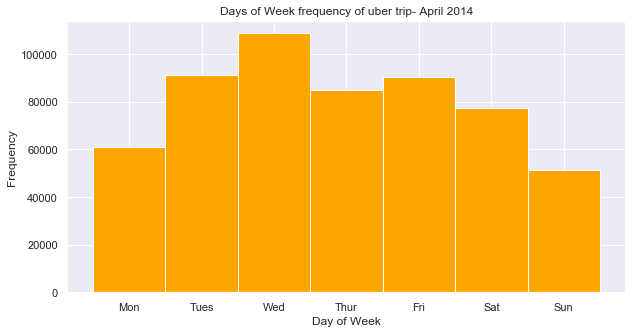

In [22]:
plt.figure(figsize=(10,5))
plt.hist(df['WeekDay'], bins=7, color='Orange', range=(-0.5,6.5))
plt.xticks(range(7), 'Mon Tues Wed Thur Fri Sat Sun'.split())
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.title('Days of Week frequency of uber trip- April 2014')
plt.show()

- Analyzing hour of the day

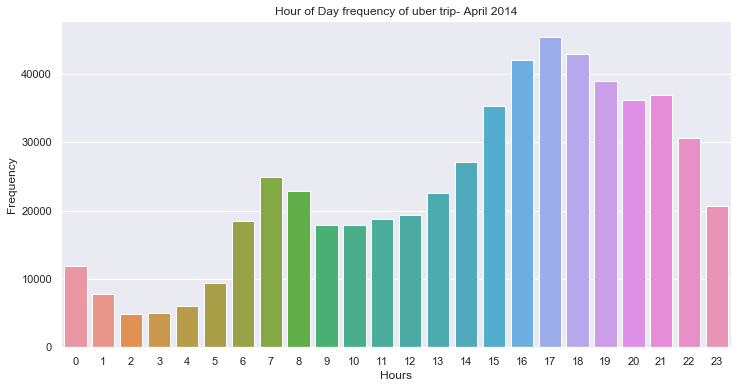

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(df.DayHour) 
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Hour of Day frequency of uber trip- April 2014')
plt.show()

## Cross Analysis



- Analysis hour and weekday

In [24]:
def count_rows(rows):
    return len(rows)

by_WH = df.groupby('WeekDay DayHour'.split()).apply(count_rows).unstack()

In [25]:
by_WH

DayHour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
WeekDay,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


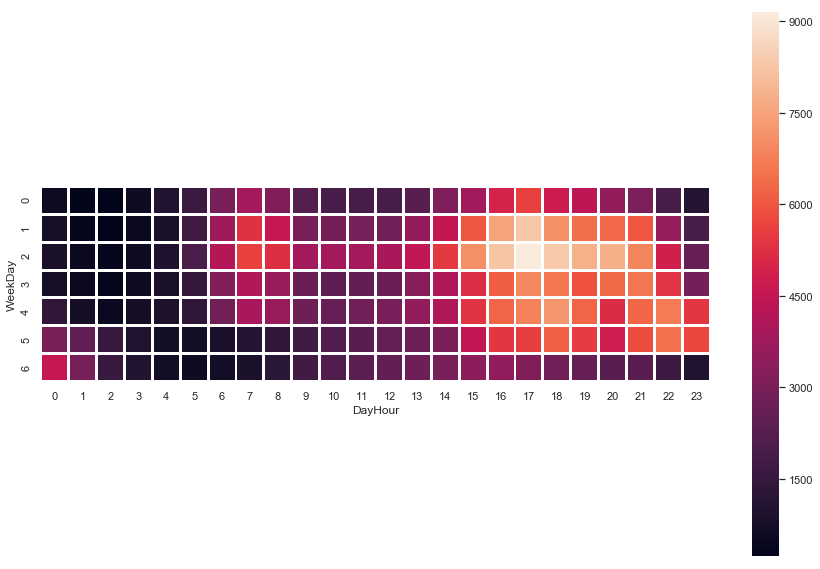

In [26]:
plt.figure(figsize=(15,10))
sns.heatmap(by_WH, square=True, linewidths=2);

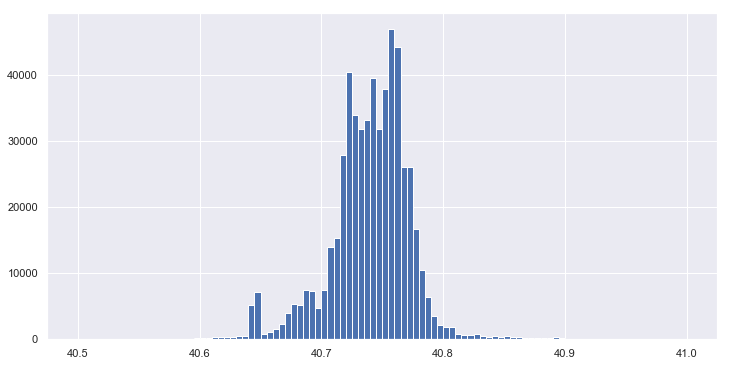

In [27]:
plt.figure(figsize=(12,6))
plt.hist(df.Lat, bins=100, range=(40.5, 41));

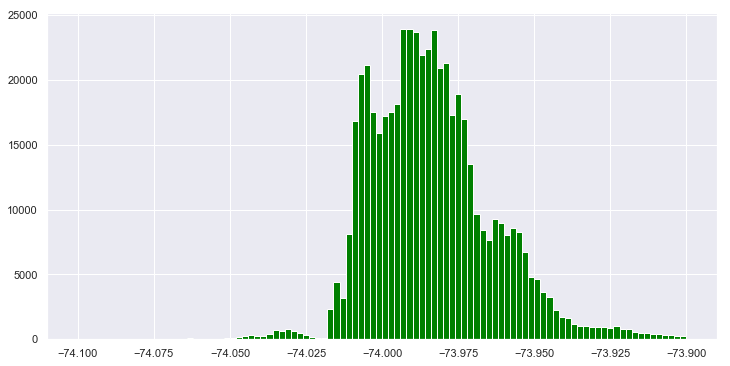

In [28]:
plt.figure(figsize=(12,6))
plt.hist(df.Lon, bins=100, range=(-74.1, -73.9) , color='green');

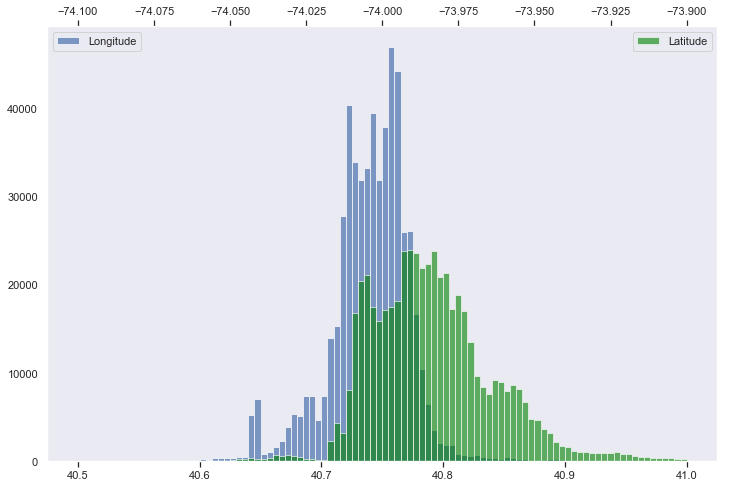

In [29]:
plt.figure(figsize=(12,8))
plt.hist(df.Lat, bins=100, range=(40.5, 41), alpha=0.7, label='Longitude');
plt.grid()
plt.legend(loc='upper left')
plt.twiny()
plt.hist(df.Lon, bins=100, range=(-74.1, -73.9) , color='green', alpha=0.6, label='Latitude');
plt.grid()
plt.legend(loc='upper right')
plt.show()

- Plotting Longitude and Latitude 

C:\Users\ASIFIQBAL\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1008x720 with 0 Axes>

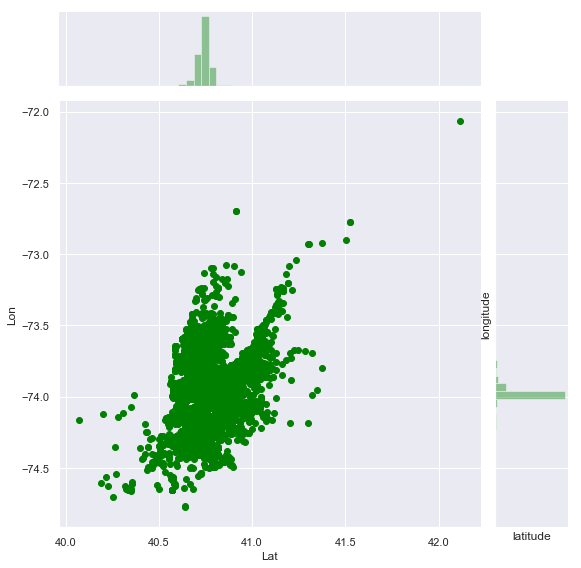

In [30]:
plt.figure(figsize=(14,10))
sns.jointplot(x='Lat',y='Lon',data=df, height=8, kind='scatter', color='Green')
plt.ylabel('longitude')
plt.xlabel('latitude')
plt.show()

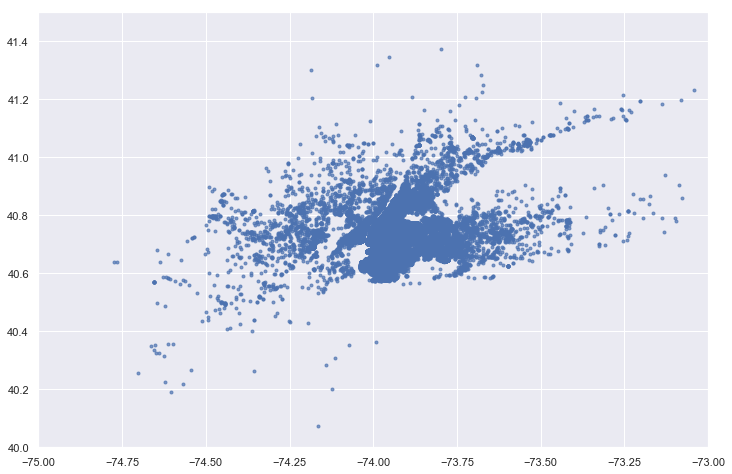

In [31]:
plt.figure(figsize=(12,8))
plt.plot(df.Lon, df.Lat,'.', alpha=.7)
plt.xlim(-75,-73)
plt.ylim(40,41.5)
plt.show()